# CRISM SAMP Hub notebook 
## This notebook connects to the CRISM catalogue hosted at Jacobs University. It allows to see the list of available CRISM images, select one and visualize it.


### The following cell starts the SAMP and waits for the user to send the data. You should go to  [VESPA](http://vespa.obspm.fr/planetary/data/epn/query/all/), search for the CRISM catalogue and press the "send SAMP" button.

In [1]:
from astropy.vo.samp import SAMPHubServer

hub = SAMPHubServer()
hub.start()

INFO: Hub set to run with Web Profile support enabled. [astropy.vo.samp.hub]
INFO: Hub started [astropy.vo.samp.hub]
A Web application which declares to be

Name: Vespa
Origin: http://vespa.obspm.fr

is requesting to be registered with the SAMP Hub.
Pay attention that if you permit its registration, such
application will acquire all current user privileges, like
file read/write.

Do you give your consent? [yes|no]
>>> yes


### This waits to receive the data from VESPA

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import urllib
from astropy.table import Table
from astropy.vo.samp import SAMPIntegratedClient

client = SAMPIntegratedClient()
client.connect()

class Receiver(object):
    def __init__(self, client):
        self.client = client
        self.received = False
    def receive_call(self, private_key, sender_id, msg_id, mtype, params, extra):
        self.params = params
        self.received = True
        self.client.reply(msg_id, {"samp.status": "samp.ok", "samp.result": {}})
    def receive_notification(self, private_key, sender_id, mtype, params, extra):
        self.params = params
        self.received = True

r = Receiver(client)

client.bind_receive_call("table.load.votable", r.receive_call)
client.bind_receive_notification("table.load.votable", r.receive_notification)

client.bind_receive_call("table.load.cdf", r.receive_call)
client.bind_receive_notification("table.load.cdf", r.receive_notification)

client.bind_receive_call("table.load.fits", r.receive_call)
client.bind_receive_notification("table.load.fits", r.receive_notification)

### Check that it is received

In [3]:
r.received

True

### Show parameters (name of service and URL)

In [4]:
r.params

{'name': 'crism',
 'url': 'http://epn1.epn-vespa.jacobs-university.de/__system__/tap/run/tap/sync?LANG=ADQL&QUERY=SELECT+%2A+FROM+crism.epn_core+WHERE+%281+%3D+ivo_hashlist_has%28lower%28%22target_name%22%29%2Clower%28%27Mars%27%29%29+OR+1+%3D+ivo_hashlist_has%28lower%28%22target_name%22%29%2Clower%28%274%27%29%29%29+&REQUEST=doQuery&MAXREC=1000000000'}

### Read and show the table from the selected endpoint

In [5]:
t = Table.read(r.params['url'])
t

granule_uid,granule_gid,obs_id,dataproduct_type,target_name,target_class,time_min,time_max,time_sampling_step_min,time_sampling_step_max,time_exp_min,time_exp_max,spectral_range_min,spectral_range_max,spectral_sampling_step_min,spectral_sampling_step_max,spectral_resolution_min,spectral_resolution_max,c1min,c1max,c2min,c2max,c3min,c3max,s_region,c1_resol_min,c1_resol_max,c2_resol_min,c2_resol_max,c3_resol_min,c3_resol_max,spatial_frame_type,incidence_min,incidence_max,emergence_min,emergence_max,phase_min,phase_max,instrument_host_name,instrument_name,measurement_type,processing_level,creation_date,modification_date,release_date,service_title,access_url,access_format,access_estsize,thumbnail_url,bib_reference,solar_longitude_min,solar_longitude_max,sensor_id,image_width,image_height,subgranule_url
,,,,,,d,d,s,s,s,s,Hz,Hz,Hz,Hz,Hz,Hz,deg,deg,deg,deg,m,m,,deg,deg,deg,deg,m,m,,deg,deg,deg,deg,deg,deg,,,,,,,,,,,kbyte,,,deg,deg,,pix,pix,
object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,float64,float64,float64,float64,float64,float64,object,object,object,int32,object,object,object,object,object,object,int32,object,object,float64,float64,object,int32,int32,object
HRL000052FF_07_IF155L_TRR3,HRL,000052FF,sc,Mars,planet,2454197.2650845898,2454197.26512782,--,--,--,--,1001.3,3936.8000000000002,6.5499999999999998,6.5499999999999998,9.6999999999999993,17.5,255.99100000000001,256.35199999999998,-32.155000000000001,-32.012999999999998,--,--,Polygon UNKNOWNFrame 103.649 -32.096 103.739 -32.097 103.824 -32.124 103.909 -32.155 103.995 -32.149 103.996 -32.15 103.998 -32.135 104.004 -32.103 104.009 -32.07 103.917 -32.073 103.83 -32.049 103.746 -32.015 103.66 -32.013 103.653 -32.06 103.648 -32.097,0.0061186440677959602,0.0061186440677959602,0.0052592592592593697,0.0052592592592593697,--,--,body,54.748085021972699,54.748085021972699,60.414237976074197,60.414237976074197,62.098415374755902,62.098415374755902,MRO,CRISM,phys.albedo,3,2016-01-01,2016-01-01,2016-01-01,CRISM,http://access.planetserver.eu:8080/rasdaman/ows?&SERVICE=WCS&VERSION=2.0.1&REQUEST=GetCoverage&COVERAGEID=hrl000052ff_07_if155l_trr3&FORMAT=image/tiff,application/x-geotiff,2810,"http://access.planetserver.eu:8080/rasdaman/ows?service=WCS&version=2.0.1&request=ProcessCoverages&query=for%20data%20in%20%28%20hrl000052ff_07_if155l_trr3%20%29%20return%20encode%28%20{%20red:%20%28float%29%28%28int%29%28255%20/%20%28max%28%20data.band_54%29%20-%20min%28data.band_54%29%29%29%20*%20%28data.band_54%20-%20min%28data.band_54%29%29%29;%20green:%20%28float%29%28%28int%29%28255%20/%20%28max%28%20data.band_37%29%20-%20min%28data.band_37%29%29%29%20*%20%28data.band_37%20-%20min%28data.band_37%29%29%29;%20blue:%20%28float%29%28%28int%29%28255%20/%20%28max%28%20data.band_27%29%20-%20min%28data.band_27%29%29%29%20*%20%28data.band_27%20-%20min%28data.band_27%29%29%29%20;%20alpha:%20%28float%29%28%28data.band_100%20%3E%200%29%20*%20255%29},%20%22png%22,%20%22nodata=65535%22%29",10.1029/2006JE002682,214.20289700000001,214.20289700000001,L,59,27,http://epn1.epn-vespa.jacobs-university.de:8080/subGranule/index.html?cov=hrl000052ff_07_if155l_trr3&c1_min=255.991&c1_min=255.991&c1_max=256.352&c2_min=-32.155&c2_max=-32.013&E_px=59&N_px=27&sensor_id=l
HRL00005C79_07_IF156S_TRR3,HRL,00005C79,sc,Mars,planet,2454240.21110263,2454240.2111458401,--,--,--,--,364.60000000000002,1056.0,6.5499999999999998,6.5499999999999998,8.5999999999999996,10.0,326.18099999999998,326.53300000000002,22.989999999999998,23.100000000000001,--,--,Polygon UNKNOWNFrame 33.483 23.1 33.569 23.097 33.653 23.088 33.739 23.086 33.819 23.079 33.815 23.021 33.812 22.99 33.725 22.998 33.549 23.008 33.467 23.014 33.474 23.052 33.48 23.091,0.0054153846153851097,0.0054153846153851097,0.0047826086956523003,0.0047826086956523003,--,--,body,65.986427307128906,

### Select an entry in the table (change value inside t[])

In [12]:
url = t[900]['thumbnail_url']

### This is used to read non image data (e.g: XML)

In [13]:
#print f.read()


### This is used to read image data (e.g: PNG)


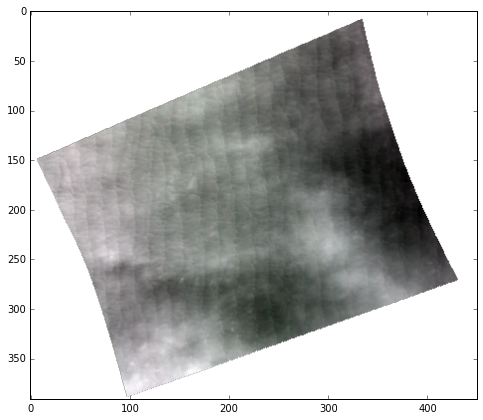

In [14]:
f = urllib.urlopen(url)
fig = plt.figure(figsize=(8,8))
image = plt.imread(f)
plt.imshow(image)
